In [1]:
from PIL import Image,ImageEnhance
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from skimage.metrics import structural_similarity as ssim

In [2]:
def color_balance(inpath):
    outpath=r'C:\Users\ardenus\Downloads\color_balanced_images'
    filenames = glob.glob(inpath+"\*.*")
    for f in filenames:
        file,ext=os.path.splitext(f)
        image = Image.open(file+ext)
        plt.imshow(mpimg.imread(file+ext))
        plt.show()
        img_arr = np.array(image)
        print(np.shape(img_arr))
        arr_mean = np.mean(img_arr,axis=(0,1))
        print(f'[{file},R={arr_mean[0]},G={arr_mean[1]},B={arr_mean[2]}]')
        #print(arr_mean)
        img_avg = sum(arr_mean)/3
        #print("average of 3 channels average")
        print(img_avg) # average of 3 channels average
        for i in range(len(arr_mean)):
            arr_mean[i]=int(img_avg-arr_mean[i])
        #print("difference between average of 3 channels average and average of each channel")
        print(arr_mean) # difference between average of 3 channels average and average of each channel
        for y in range(image.height):
            for x in range(image.width):
                r,g,b=image.getpixel((x,y))
        #print(arr_mean)
                r=int(r+arr_mean[0])
                g=int(g+arr_mean[1])
                b=int(b+arr_mean[2])
                image.putpixel((x,y),(r,g,b))
        save_file_name = os.path.join(outpath,os.path.basename(file)+ext)
        image.save(save_file_name)
        plt.imshow(mpimg.imread(save_file_name))
        plt.show()
        #image.show()
        image_array = np.array(Image.open(save_file_name))
        mean = np.mean(image_array,axis=(0,1))
        print("color balanced image mean",mean)

In [3]:
def imageContrast(inpath):
    outpath=r'C:\Users\ardenus\Downloads\contrast_optimized_images'
    filenames = glob.glob(inpath+"\*.*")
    for f in filenames:
        file,ext = os.path.splitext(f)
        image = Image.open(file+ext)
        print("BEFORE CONTRASTING THE IMAGE")
        plt.imshow(mpimg.imread(file+ext))
        plt.show()
        contrasted_image = ImageEnhance.Contrast(image)
        image = contrasted_image.enhance(3.5)
        save_file_name = os.path.join(outpath,os.path.basename(file)+ext)
        image.save(save_file_name)
        print("AFTER CONTRASTING THE IMAGE")
        plt.imshow(mpimg.imread(save_file_name))
        plt.show()
        #image.save(os.path.join(outpath,os.path.basename(file)+ext))

        
        #image.show()

In [4]:
def histogramStretching(inpath):
    outpath=r'C:\Users\ardenus\Downloads\histogram_stretched_images'
    filenames = glob.glob(inpath+"\*.*")
    for file in filenames:
        file,ext = os.path.splitext(file)
        image = Image.open(file+ext)
        pixel_threshold_number = image.height*image.width*0.00225
        r_array = []
        g_array = []
        b_array = []
        for y in range(image.height):
            for x in range(image.width):
                r,g,b = image.getpixel((x,y))
                r_array.append(r)
                g_array.append(g)
                b_array.append(b)
        r_array.sort()
        g_array.sort()
        b_array.sort()
#         r_array.append(np.array(image)[0].sort())
#         g_array.append(np.array(image)[1].sort())
#         b_array.append(np.array(image)[2].sort())
        red_min, red_max = r_array[int(pixel_threshold_number)], r_array[-int(pixel_threshold_number)]
        green_min, green_max = g_array[int(pixel_threshold_number)], g_array[-int(pixel_threshold_number)]
        blue_min, blue_max = b_array[int(pixel_threshold_number)], b_array[-int(pixel_threshold_number)]
        print("Before Histogram Stretching")
        plt.imshow(mpimg.imread(file+ext))
        plt.show()
        for y in range(image.height):
            for x in range(image.width):
                r,g,b = image.getpixel((x,y))
                #print("Before",(r,g,b))
                if(r<red_min):
                    r=0
                elif(r in range(red_min,red_max+1)):
                    r=255*(r-red_min)/(red_max-red_min)
                else:
                    r=red_max
                if(g<green_min):
                    g=0
                elif(g in range(green_min,green_max+1)):
                    g=255*(g-green_min)/(green_max-green_min)
                else:
                    g=green_max
                if(b<blue_min):
                    b=0
                elif(b in range(blue_min,blue_max+1)):
                    b=255*(b-blue_min)/(blue_max-blue_min)
                else:
                    b=255
                #print("After",(r,g,b))
                image.putpixel((x,y),(int(r),int(g),int(b)))
        save_file_name = os.path.join(outpath,os.path.basename(file)+ext)
        image.save(save_file_name)
        print("After Histogram Stretching")
        plt.imshow(mpimg.imread(save_file_name))
        plt.show()
        

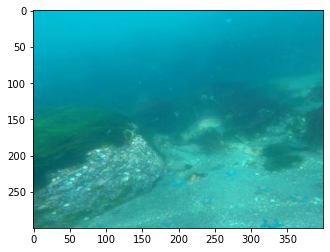

(300, 400, 3)
[C:\Users\ardenus\Downloads\images_dataset\blue_99,R=25.862066666666667,G=153.64590833333332,B=159.10491666666667]
112.87096388888888
[ 87. -40. -46.]


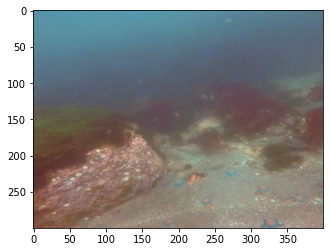

color balanced image mean [112.818625   113.36538333 112.6799    ]


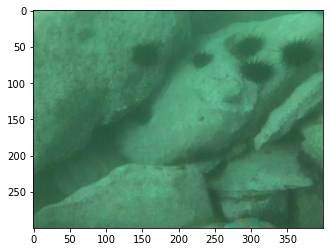

(300, 400, 3)
[C:\Users\ardenus\Downloads\images_dataset\B_701,R=70.83368333333334,G=131.23813333333334,B=98.0646]
100.04547222222222
[ 29. -31.   1.]


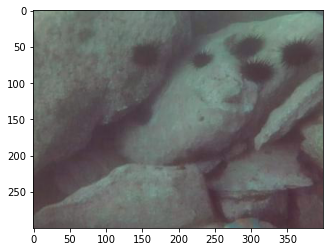

color balanced image mean [ 99.65066667 100.57419167  99.24426667]


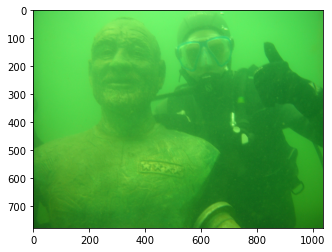

(778, 1037, 3)
[C:\Users\ardenus\Downloads\images_dataset\Img1,R=64.8578495412662,G=172.28903079627062,B=56.906848904170374]
98.01790974723572
[ 33. -74.  41.]


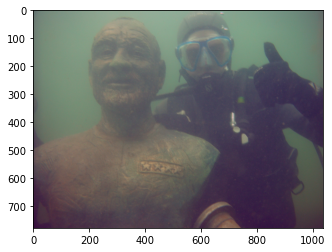

color balanced image mean [97.85784954 98.2890308  97.9068489 ]


In [5]:
color_balance(r'C:\Users\ardenus\Downloads\images_dataset')

BEFORE CONTRASTING THE IMAGE


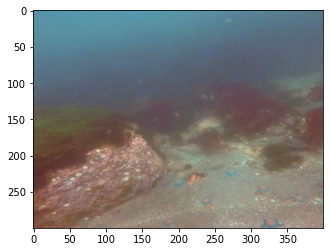

AFTER CONTRASTING THE IMAGE


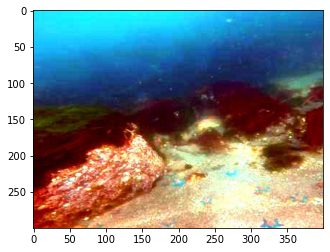

BEFORE CONTRASTING THE IMAGE


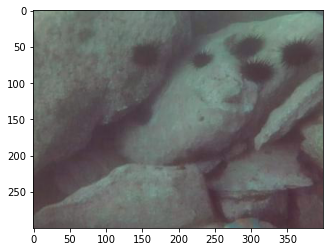

AFTER CONTRASTING THE IMAGE


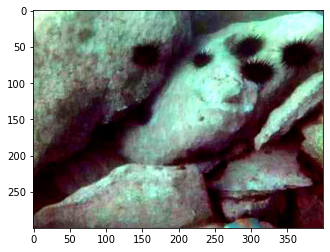

BEFORE CONTRASTING THE IMAGE


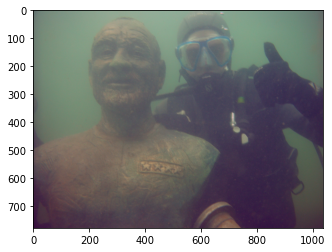

AFTER CONTRASTING THE IMAGE


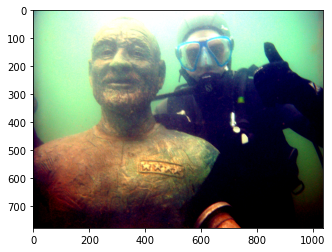

In [6]:
imageContrast(r'C:\Users\ardenus\Downloads\color_balanced_images')

Before Histogram Stretching


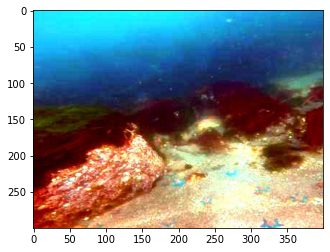

After Histogram Stretching


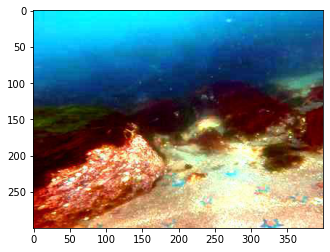

Before Histogram Stretching


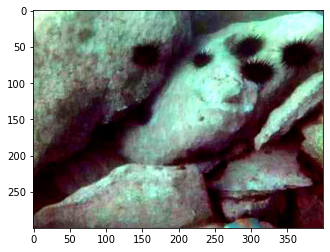

After Histogram Stretching


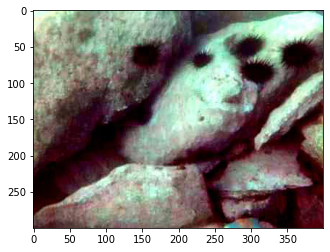

Before Histogram Stretching


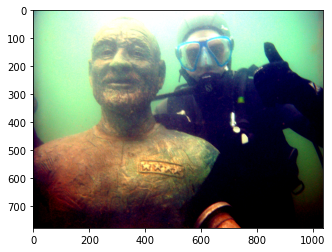

After Histogram Stretching


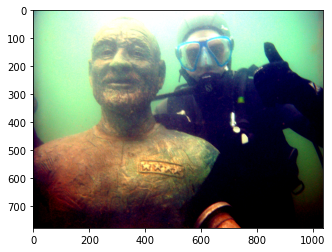

In [7]:
histogramStretching(r'C:\Users\ardenus\Downloads\contrast_optimized_images')

In [8]:
inpath = r'C:\Users\ardenus\Downloads\images_dataset'
outpath = r'C:\Users\ardenus\Downloads\histogram_stretched_images'
in_file = glob.glob(inpath+"\*.*")
out_file = glob.glob(outpath+"\*.*")
PSNR = []
SSIM = []
for i in range(len(in_file)):
    o_file,o_ext=os.path.splitext(in_file[i])
    p_file,p_ext=os.path.splitext(out_file[i])
    in_img = Image.open(o_file+o_ext)
    out_img = Image.open(p_file+p_ext)
    #print(np.sqrt(np.mean(np.array(out_img)-np.mean(np.array(out_img),axis=(0,1)))))
    in_img_arr = cv2.cvtColor(np.array(in_img),cv2.COLOR_RGB2BGR)
    out_img_arr=cv2.cvtColor(np.array(out_img),cv2.COLOR_RGB2BGR)
#     print("Input Image")
#     plt.imshow(mpimg.imread(o_file+o_ext))
#     plt.show()
#     print("Processed Image")
#     plt.imshow(mpimg.imread(p_file+p_ext))
#     plt.show()
    PSNR.append(cv2.PSNR(out_img_arr,in_img_arr))
    SSIM.append(ssim(cv2.cvtColor(out_img_arr,cv2.COLOR_BGR2GRAY),cv2.cvtColor(in_img_arr,cv2.COLOR_BGR2GRAY)))
    #print("Peak Signal to Noise Ratio =",cv2.PSNR(out_img_arr,in_img_arr))
    #print("Structure Similarity Index = ",ssim(cv2.cvtColor(out_img_arr,cv2.COLOR_BGR2GRAY),cv2.cvtColor(in_img_arr,cv2.COLOR_BGR2GRAY)))
 

# Proposed Model

In [9]:
PSNR

[10.134733679040481, 12.852159989069762, 10.646455761562667]

In [10]:
SSIM

[0.6572247185728188, 0.5348284622006473, 0.5430080596186221]